In [83]:
import pandas as pd
import numpy as np
import sklearn

In [84]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt 

In [85]:
!pip install flask-ngrok

In [86]:
import PIL.Image as Image
import io
import base64
#from data import byte_data

In [87]:
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leer ubicaciones de las imagenes y del modelo

In [88]:
path_img='/content/drive/MyDrive/ciudadlimpia/uploadImages/'
path_model='/content/drive/MyDrive/ciudadlimpia/model/my_model2.h5'

In [89]:
# y para cara cargarlo utilizamos el mismo metodo 
model_complete4 = tf.keras.models.load_model(path_model)

In [90]:
type(model_complete4)

keras.engine.functional.Functional

In [91]:
path_img


'/content/drive/MyDrive/ciudadlimpia/uploadImages/'

In [92]:
imagenaclasificar=path_img + "image20220120120931.jpg"

In [93]:
imagenOriginal=keras.preprocessing.image.load_img(imagenaclasificar)

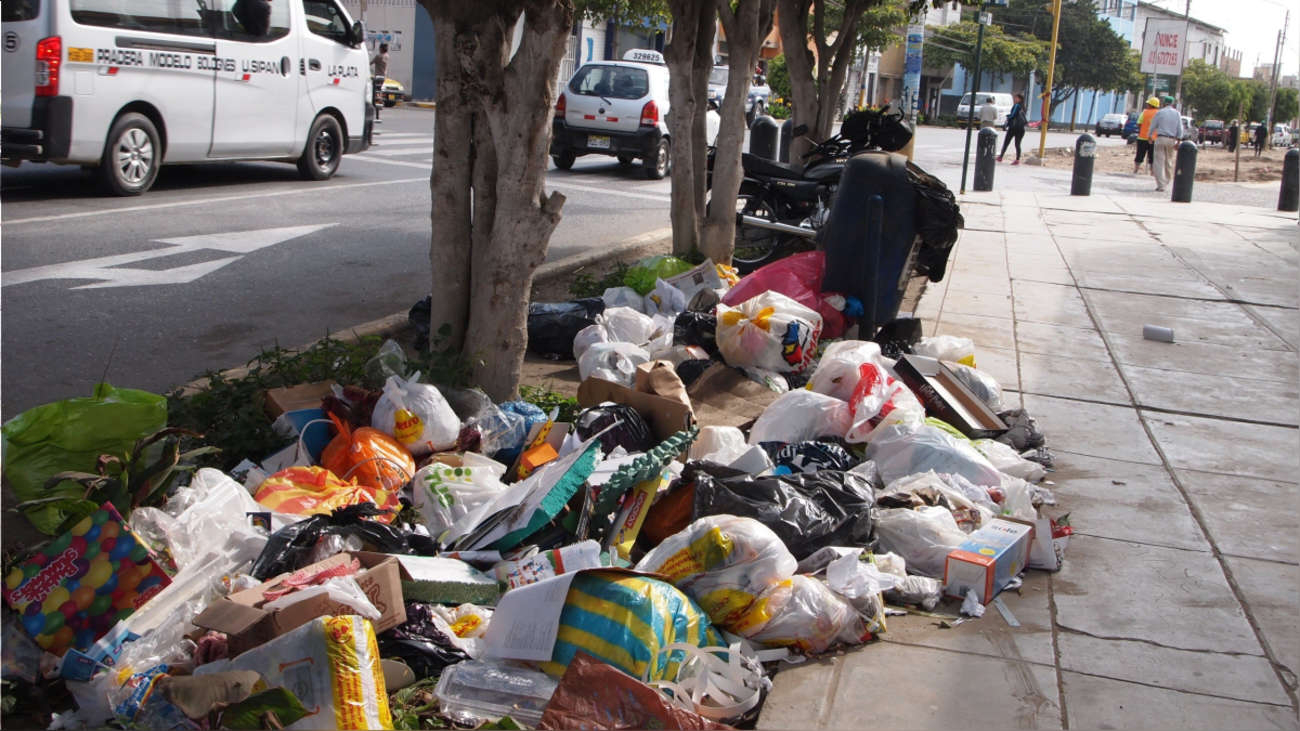

In [94]:
imagenOriginal

In [104]:
img = keras.preprocessing.image.load_img(imagenaclasificar, target_size = (150, 150) )

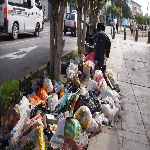

In [105]:
img

In [106]:
ggArregloNumpyImagen = keras.preprocessing.image.img_to_array(img)

In [107]:
ggArregloNumpyImagen.shape

(150, 150, 3)

In [108]:
ggTensorImgenPrediccion=tf.expand_dims(ggArregloNumpyImagen,0)

In [109]:
ggTensorImgenPrediccion

<tf.Tensor: shape=(1, 150, 150, 3), dtype=float32, numpy=
array([[[[ 37.,  37.,  37.],
         [ 23.,  22.,  27.],
         [ 37.,  37.,  37.],
         ...,
         [250., 250., 250.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[ 14.,  14.,  14.],
         [ 23.,  22.,  27.],
         [ 35.,  35.,  35.],
         ...,
         [255., 255., 255.],
         [249., 249., 249.],
         [255., 255., 255.]],

        [[ 24.,  24.,  24.],
         [ 26.,  26.,  26.],
         [ 58.,  58.,  58.],
         ...,
         [255., 255., 255.],
         [181., 177., 178.],
         [255., 254., 255.]],

        ...,

        [[ 11.,  10.,   6.],
         [ 15.,  16.,  11.],
         [ 15.,  15.,  15.],
         ...,
         [130., 122., 120.],
         [132., 123., 126.],
         [128., 119., 122.]],

        [[ 12.,   7.,   4.],
         [ 21.,  17.,  14.],
         [ 22.,  18.,  15.],
         ...,
         [127., 123., 124.],
         [129., 125., 126.],
         

In [110]:
%%time
prediccion = model_complete4.predict(ggTensorImgenPrediccion)

CPU times: user 124 ms, sys: 5.47 ms, total: 130 ms
Wall time: 101 ms


In [111]:
prediccion

array([[0.9996248]], dtype=float32)

In [112]:
prediccion[0][0]

0.9996248

In [113]:
score = prediccion[0]

In [114]:
score

array([0.9996248], dtype=float32)

In [115]:
len(prediccion)

1

In [116]:
score[0]

0.9996248

In [117]:
type(score[0])

numpy.float32

In [137]:
#pasarle la ruta de la imagen del drive para llevarlo a un objeto tensor
#para poder realizar la prediccion
#con el metodo predict del modelo
def imageToTensorImagen(img_path ,target_size_var, axis):
    img = keras.preprocessing.image.load_img(img_path, target_size = target_size_var )
    ggArregloNumpyImagen = keras.preprocessing.image.img_to_array(img)
    ggTensorImgenPrediccion=tf.expand_dims(ggArregloNumpyImagen,axis)
    return(ggTensorImgenPrediccion)

In [140]:
def transfor_predict(predict,umbral):
  x=0
  for y in predict:
    if y > umbral :
      x=1
    else:
      x=0
  return(x) 

In [141]:
def model_predict(model, imagePath):
    test_datagen = ImageDataGenerator(rescale=1./255,validation_split= 0.2)
    test_dir= imagePath

    test_img_resize = imageToTensorImagen(imagePath,(150, 150),0)
    predict=model.predict(test_img_resize)
    predict=transfor_predict(predict,0.50)
    return(str(predict))


In [142]:
from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify, render_template,request
app = Flask(__name__)
run_with_ngrok(app) #starts ngrok when the app is running

@app.route('/', methods=['GET','POST'])
def home():
    if request.method=='GET':

        result = {'result':'voila'}
        return result
    if request.method=='POST':
        imageID = request.form.get('filename')
        Byte_Im = request.form.get('file')
        imagenpath = path_img + imageID
        #*************  decodificar para pasarlo a imagen a la carpeta
        image2bytes = Byte_Im.encode('utf-8')
        #image2bytes = Byte_Im
        with open(imagenpath,'wb') as file_to_save:
            decoded_image_data = base64.decodebytes(image2bytes)
            file_to_save.write(decoded_image_data)
        #************
        prediccion=model_predict(model_complete4,imagenpath)
        
        result = {'result':prediccion}
        return result
    else:
      result = {'result':'NOPOST'}
      return result 

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://8080-34-80-175-235.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [20/Jan/2022 07:04:29] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jan/2022 07:04:42] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jan/2022 07:04:47] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jan/2022 07:04:56] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jan/2022 07:05:02] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jan/2022 07:05:32] "POST / HTTP/1.1" 200 -
